# Prediction of time-series 

We use LSTM network for regression methods of time-series.

For other ways of time-series analysis and prediction see.
https://github.com/2wavetech/Time-Series-Analysis-and-Prediction


# Load data

In [1]:

import pandas as pd
import csv
#import plotly.plotly as py
#import plotly.graph_objs as go


filepath = "C:/Users/lyubo/Documents/DATA_networks/patients_data/MonsterMizer-master/MonsterMizerOpenData/"#'C:/Users/tupikina/Documents/Python_Scripts/MonsterMizer-master'

df = pd.read_csv(filepath +'data_patients.csv')
df.head(10)


,Unnamed: 0,basisPeakSteps,steps,denivelation,kneePain,handsAndFingerPain,foreheadAndEyesPain,forearmElbowPain,aroundEyesPain,shoulderNeckPain,...,walk,roadBike,mountainBike,swimming,surfing,climbing,viaFerrata,alpiSki,downSki,eyeRelatedActivities
0,2015-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-11-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-11-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-11-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015-11-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015-11-25,0.0,0.0,0.0,5.7,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
7,2015-11-26,0.0,0.0,0.0,5.0,2.8,3.9,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015-11-27,0.0,0.0,0.0,5.0,2.8,3.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015-11-28,0.0,0.0,0.0,6.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0



# Method using LSTM

We rephrase the problem as a regression problem for prediction of time-series using LSTM network for regression.

Given the time-series of pain level P(t), what is the expected pain level next day? 

We can write a simple function to convert our single column of data P(t) into a two-column dataset: the first column containing this month's P(t) and the second column containing next month's (t+1) pain to be predicted.



In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


We use TensorFlow backend.

We fix the random number seed to ensure our results are reproducible.



In [3]:
# fix random seed for reproducibility
seed = numpy.random.seed(7)

# Preprocess data to needed format 

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

Initially we have the array *pain* non-rescaled from 0 to 5 (with some missing values), while *activity* is rescaled from 0 to 1.


In [4]:
import numpy as np 

'''tp.plot_timeseries(data, datatime, var_names)'''
#array = df.values
#print(type(dataframe.values))
#print(array.shape)
print('calculating time series for pain')

pain = df.kneePain.values #array[:,3]
activity = df.walk.values #array[:,1] or for walk 
steps = df.steps.values

array = np.zeros((3,np.shape(pain)[0]))
array[0,:] = pain
array[1,:] = steps
print('nonzero steps', np.count_nonzero(array[1,:]))
#print(array[0,7])


calculating time series for pain
nonzero steps 1118


# Normalize the dataset
We normalise and cut dataset (exclude first elements which are zero records).

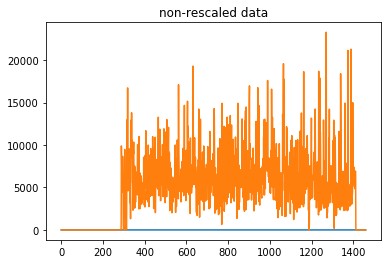

nonzero elements 1431
nonzero elements 1118
first nonzero element 6
cut array 1454
cutting 287 zero values for array


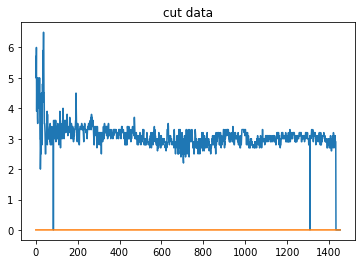

In [5]:

import numpy
import matplotlib.pyplot as plt

data_range = (0, 1)
scaler = MinMaxScaler(feature_range=data_range)        # scaler can also de-normalize the dataset by scaler.inverse_transform(), useful for actual prediction
# scaling works by the formula X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# now we scale array with several variables in it
#array_scaled = scaler.fit_transform(array)  #pain.reshape(-1, 1)# scaler.fit_transform(pain_array) # for 2D array

plt.title('non-rescaled data')
plt.plot(array[0,:])
plt.plot(array[1,:])
plt.show()


#print('total shape', array_scaled[0,:].shape)
# here we check that we get only nonzero elements in rescaled data if we have nonzero element in original dat
print('nonzero elements', np.count_nonzero(array[0,:]))
print('nonzero elements', np.count_nonzero(array[1,:]))
#print('nonzero elements', np.count_nonzero(array_scaled[0,:]))
#print('nonzero elements', np.count_nonzero(array_scaled[1,:]))


n_nnz = (array[0,:]!=0).argmax(axis=0)
print('first nonzero element', (array[0,:]!=0).argmax(axis=0))
print('cut array', np.shape(array)[1] - n_nnz)

print('cutting 287 zero values for array')
cut_array = np.zeros((3, np.shape(array)[1] - n_nnz))
cut_array[0,:] = array[0,n_nnz:np.shape(array)[1]]
#cut_array[1,:] = array[1,287:1431]

plt.title('cut data')
plt.plot(cut_array[0,:])
plt.plot(cut_array[1,:])
plt.show()


normalised


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


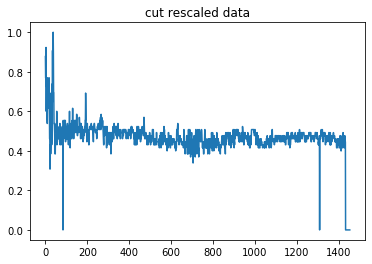

In [6]:
array_scaled = cut_array

# normalize the dataset in alternative way: devide by the maximum array element:
array_scaled[0, :] =  cut_array[0, :]* 1./max(cut_array[0, :]) ##X_std = (X ) / (X.max(axis=0))
array_scaled[1, :] =  cut_array[1, :]* 1./max(cut_array[1, :]) ##X_std = (X ) / (X.max(axis=0))

print('normalised')

plt.title('cut rescaled data')
plt.plot(array_scaled[0,:])
plt.show()


# split into train and test sets

A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model

In [9]:
# split into train and test sets

train_size = int(len(array_scaled[0,:]) * 0.67)
test_size = len(array_scaled[0,:]) - train_size


train, test = array_scaled[0,0:train_size], array_scaled[0,train_size:len(array_scaled[0,:])]
print(len(train), len(test))

974 480


Now we can define a function to create a new dataset, as described above.

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period in this case defaulted to 1.

This default will create a dataset where X is the pain level at a given time (t) and Y is the pain level at the next time (t + 1).

It can be configured, and we will by constructing a differently shaped dataset in the next section.

In [10]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    i_range = len(data) - look_back - 1
    print(i_range)
    for i in range(0, i_range):
        dataX.append(data[i:(i+look_back)])    # index can move down to len(dataset)-1
        dataY.append(data[i + look_back])      # Y is the item that skips look_back number of items
    
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
look_back = 4

dataX, dataY = create_dataset(array_scaled[0,:], look_back=look_back)
print('shape of datax', np.shape(dataX), np.shape(dataY))

1449
shape of datax (1449, 4) (1449,)


In [22]:
print("X shape:", dataX.shape)
print("Y shape:", dataY.shape)
   
print("Xt-3     Xt-2      Xt-1      Xt        Y")
print("---------------------------------------------")
print('for look back steps', look_back)


for i in range(len(dataX)): 
    print('%.2f   %.2f    %.2f    %.2f    %.2f', dataX[i,0],dataX[i,1],dataX[i,2],dataX[i,3], dataY[i])
#    print('%.2f   %.2f    %.2f    %.2f    %.2f' % (dataX[i][0][0], dataX[i][1][0], dataX[i][2][0], dataX[i][3][0], dataY[i][0]))

X shape: (1449, 4)
Y shape: (1449,)
Xt-3     Xt-2      Xt-1      Xt        Y
---------------------------------------------
for look back steps 4
%.2f   %.2f    %.2f    %.2f    %.2f 0.8769230769230769 0.7692307692307693 0.7692307692307693 0.9230769230769231 0.6
%.2f   %.2f    %.2f    %.2f    %.2f 0.7692307692307693 0.7692307692307693 0.9230769230769231 0.6 0.7692307692307693
%.2f   %.2f    %.2f    %.2f    %.2f 0.7692307692307693 0.9230769230769231 0.6 0.7692307692307693 0.7230769230769231
%.2f   %.2f    %.2f    %.2f    %.2f 0.9230769230769231 0.6 0.7692307692307693 0.7230769230769231 0.7230769230769231
%.2f   %.2f    %.2f    %.2f    %.2f 0.6 0.7692307692307693 0.7230769230769231 0.7230769230769231 0.5692307692307692
%.2f   %.2f    %.2f    %.2f    %.2f 0.7692307692307693 0.7230769230769231 0.7230769230769231 0.5692307692307692 0.5384615384615384
%.2f   %.2f    %.2f    %.2f    %.2f 0.7230769230769231 0.7230769230769231 0.5692307692307692 0.5384615384615384 0.6923076923076923
%.2f   %.2f  

%.2f   %.2f    %.2f    %.2f    %.2f 0.46153846153846156 0.46153846153846156 0.5230769230769231 0.5384615384615384 0.5230769230769231
%.2f   %.2f    %.2f    %.2f    %.2f 0.46153846153846156 0.5230769230769231 0.5384615384615384 0.5230769230769231 0.5076923076923077
%.2f   %.2f    %.2f    %.2f    %.2f 0.5230769230769231 0.5384615384615384 0.5230769230769231 0.5076923076923077 0.5076923076923077
%.2f   %.2f    %.2f    %.2f    %.2f 0.5384615384615384 0.5230769230769231 0.5076923076923077 0.5076923076923077 0.49230769230769234
%.2f   %.2f    %.2f    %.2f    %.2f 0.5230769230769231 0.5076923076923077 0.5076923076923077 0.49230769230769234 0.49230769230769234
%.2f   %.2f    %.2f    %.2f    %.2f 0.5076923076923077 0.5076923076923077 0.49230769230769234 0.49230769230769234 0.5230769230769231
%.2f   %.2f    %.2f    %.2f    %.2f 0.5076923076923077 0.49230769230769234 0.49230769230769234 0.5230769230769231 0.49230769230769234
%.2f   %.2f    %.2f    %.2f    %.2f 0.49230769230769234 0.49230769230769

%.2f   %.2f    %.2f    %.2f    %.2f 0.4461538461538461 0.4153846153846154 0.46153846153846156 0.5076923076923077 0.46153846153846156
%.2f   %.2f    %.2f    %.2f    %.2f 0.4153846153846154 0.46153846153846156 0.5076923076923077 0.46153846153846156 0.43076923076923074
%.2f   %.2f    %.2f    %.2f    %.2f 0.46153846153846156 0.5076923076923077 0.46153846153846156 0.43076923076923074 0.43076923076923074
%.2f   %.2f    %.2f    %.2f    %.2f 0.5076923076923077 0.46153846153846156 0.43076923076923074 0.43076923076923074 0.43076923076923074
%.2f   %.2f    %.2f    %.2f    %.2f 0.46153846153846156 0.43076923076923074 0.43076923076923074 0.43076923076923074 0.43076923076923074
%.2f   %.2f    %.2f    %.2f    %.2f 0.43076923076923074 0.43076923076923074 0.43076923076923074 0.43076923076923074 0.38461538461538464
%.2f   %.2f    %.2f    %.2f    %.2f 0.43076923076923074 0.43076923076923074 0.43076923076923074 0.38461538461538464 0.4461538461538461
%.2f   %.2f    %.2f    %.2f    %.2f 0.43076923076923074 

%.2f   %.2f    %.2f    %.2f    %.2f 0.4461538461538461 0.43076923076923074 0.4461538461538461 0.4153846153846154 0.43076923076923074
%.2f   %.2f    %.2f    %.2f    %.2f 0.43076923076923074 0.4461538461538461 0.4153846153846154 0.43076923076923074 0.46153846153846156
%.2f   %.2f    %.2f    %.2f    %.2f 0.4461538461538461 0.4153846153846154 0.43076923076923074 0.46153846153846156 0.46153846153846156
%.2f   %.2f    %.2f    %.2f    %.2f 0.4153846153846154 0.43076923076923074 0.46153846153846156 0.46153846153846156 0.5076923076923077
%.2f   %.2f    %.2f    %.2f    %.2f 0.43076923076923074 0.46153846153846156 0.46153846153846156 0.5076923076923077 0.5076923076923077
%.2f   %.2f    %.2f    %.2f    %.2f 0.46153846153846156 0.46153846153846156 0.5076923076923077 0.5076923076923077 0.46153846153846156
%.2f   %.2f    %.2f    %.2f    %.2f 0.46153846153846156 0.5076923076923077 0.5076923076923077 0.46153846153846156 0.46153846153846156
%.2f   %.2f    %.2f    %.2f    %.2f 0.5076923076923077 0.507692

In [23]:
# Reshape to (samples, timestep, features)
dataX = numpy.reshape(dataX, (dataX.shape[0], 1, dataX.shape[1]))

print("X shape:", dataX.shape) #X shape: (1455, 1, 4)

X shape: (1449, 1, 4)


In [25]:
# Let's use this function to prepare the train and test datasets for modeling.

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)      # trainX is input, trainY is expected output
testX, testY = create_dataset(test, look_back)

972
478


The LSTM network expects the input data (X) to be provided with a specific array structure in the form of 3D: [samples, time steps, features], or in other words, 3D tensor with shape (batch_size, timesteps, input_dim), or optionally, 2D tensors with shape (batch_size, output_dim).

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [26]:
# reshape input to be [samples, time steps, features]
print("Original trainX shape:", trainX.shape)
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))     # timestep = 1, input_dim = trainX.shape[1]
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
print("New trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("trainY example:", trainY[0])

#Old input Original trainX shape: (976, 1, 1)
#New trainX shape: (976, 1, 1)
#trainY shape: (976, 1)
#trainY example: [0.0]


Original trainX shape: (972, 1)
New trainX shape: (972, 1, 1)
trainY shape: (972,)
trainY example: 0.7692307692307693


# LSTM fit

In [27]:
# create and fit the LSTM network
from keras.layers import Dropout

batch_size = 1
timesteps = trainX.shape[1]
input_dim = trainX.shape[2]

model = Sequential()
#model.add(LSTM(8, input_shape=(1, look_back)))    # 4 or 8 is the number of LSTM units or dimensions of output of LSTM layer, can be any integer. input_shape must show up in the first layer
model.add(LSTM(4, batch_input_shape=(batch_size, timesteps, input_dim)))
model.add(Dense(10))    # not necessary, but just want to try it
#model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)   # it turns out that epochs = 15 is enough, 100 is not necess

Epoch 1/50
 - 3s - loss: 0.0149
Epoch 2/50
 - 2s - loss: 0.0033
Epoch 3/50
 - 2s - loss: 0.0028
Epoch 4/50
 - 2s - loss: 0.0026
Epoch 5/50
 - 2s - loss: 0.0024
Epoch 6/50
 - 2s - loss: 0.0024
Epoch 7/50
 - 2s - loss: 0.0024
Epoch 8/50
 - 2s - loss: 0.0023
Epoch 9/50
 - 2s - loss: 0.0025
Epoch 10/50
 - 2s - loss: 0.0024
Epoch 11/50
 - 2s - loss: 0.0024
Epoch 12/50
 - 2s - loss: 0.0023
Epoch 13/50
 - 2s - loss: 0.0023
Epoch 14/50
 - 2s - loss: 0.0024
Epoch 15/50
 - 2s - loss: 0.0024
Epoch 16/50
 - 2s - loss: 0.0023
Epoch 17/50
 - 5s - loss: 0.0024
Epoch 18/50
 - 3s - loss: 0.0023
Epoch 19/50
 - 2s - loss: 0.0024
Epoch 20/50
 - 3s - loss: 0.0023
Epoch 21/50
 - 2s - loss: 0.0024
Epoch 22/50
 - 2s - loss: 0.0024
Epoch 23/50
 - 2s - loss: 0.0023
Epoch 24/50
 - 2s - loss: 0.0024
Epoch 25/50
 - 2s - loss: 0.0023
Epoch 26/50
 - 2s - loss: 0.0024
Epoch 27/50
 - 2s - loss: 0.0023
Epoch 28/50
 - 2s - loss: 0.0023
Epoch 29/50
 - 2s - loss: 0.0024
Epoch 30/50
 - 2s - loss: 0.0023
Epoch 31/50
 - 2s -

Once the model is fit, we can estimate the performance of the model on the train and test datasets. This will give us a point of comparison for new models.

Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data.
    

In [28]:

# make predictions
trainPredict = model.predict(trainX, batch_size)
testPredict = model.predict(testX, batch_size)  

# Plotting

In [43]:
# shift train predictions for plotting
#trainPredictPlot = numpy.empty_like(dataset_scaled)
#trainPredictPlot[:, :] = numpy.nan
#print(trainPredictPlot[0])
#trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(array_scaled[0,:])#dataset_scaled)
testPredictPlot[:] = numpy.nan
print(np.shape(testPredict))
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(array_scaled[0,:])-1] = testPredict[:,0]


(478, 1)


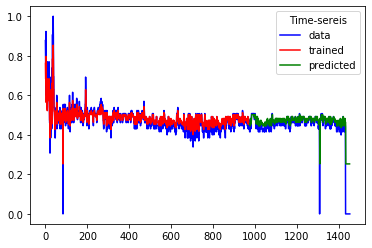

In [45]:

# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset_scaled))
plt.plot(array_scaled[0,:],'b', label='data')
plt.plot(trainPredict,'r', label='trained')
plt.plot(testPredictPlot, 'g', label='predicted')
plt.legend(title ='Time-sereis')#['scaled','train','predicted'])
plt.show()

# Old predictions

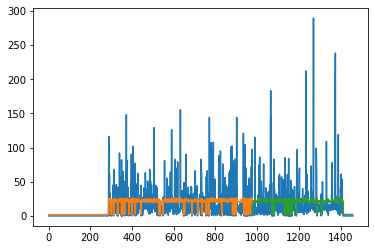

In [23]:

# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset_scaled))
plt.plot(dataset_scaled)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Prediction accuracy 


We estimate the accuracy for the pain level as number of cases when pain level is above the mean pain level $<P(t)>$.



In [ ]:
# calculate the number of false positive 




# calculate the number of false negative 